# **Cost of Acquiring a Customer (CAC) Analysis and Prediction**
Food Mart in the USA runs food campaigns on various media platforms to attract new customers. The company has detailed data on purchases made by these new customers. 
Predicting CAC offers significant benefits to the business, such as optimizing pricing strategies and preventing overinvestment in customer acquisition. <br>

**About the dataset :** [Link to Dataset](https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart/data)<br>
The dataset contains 40 columns across various fields, covering products, sales, customers, and stores. <br>
Here are examples of notable columns:
- **Product**  - FoodType, FoodDepartment
- **Sales**    - UnitSales, Promotion, SRP, Mediatype
- **Customer** - Gender, Marital, Children, Education, Occupation
- **Store**    - StoreSales, StoreCost,Storetype, CAC

**Project Procedure :** 
- Exploratory Data Analysis (EDA)
- Data Pre-processing
- Model Development
- Project Summary
- Business Impact and Insights

## **Exploratory Data Analysis (EDA)** 
We explored the dataset to become more familiar with its structure, understand its patterns, and identify key insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

In [2]:
campaign_df = pd.read_csv('/kaggle/input/medias-cost-prediction-in-foodmart/media prediction and its cost.csv')
campaign_df.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [4]:
campaign_df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,0.558665,0.350434,18.860694,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,0.496551,0.477110,10.258555,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,0.000000,0.000000,10.000000,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


As you can see, the dataset consists of 40 columns across various fields, with no null values in any row. <br>
Next, we will plot some key features to gain a deeper understanding of the data.

### **Visualization and Insights**

### **Basic information about our customers**

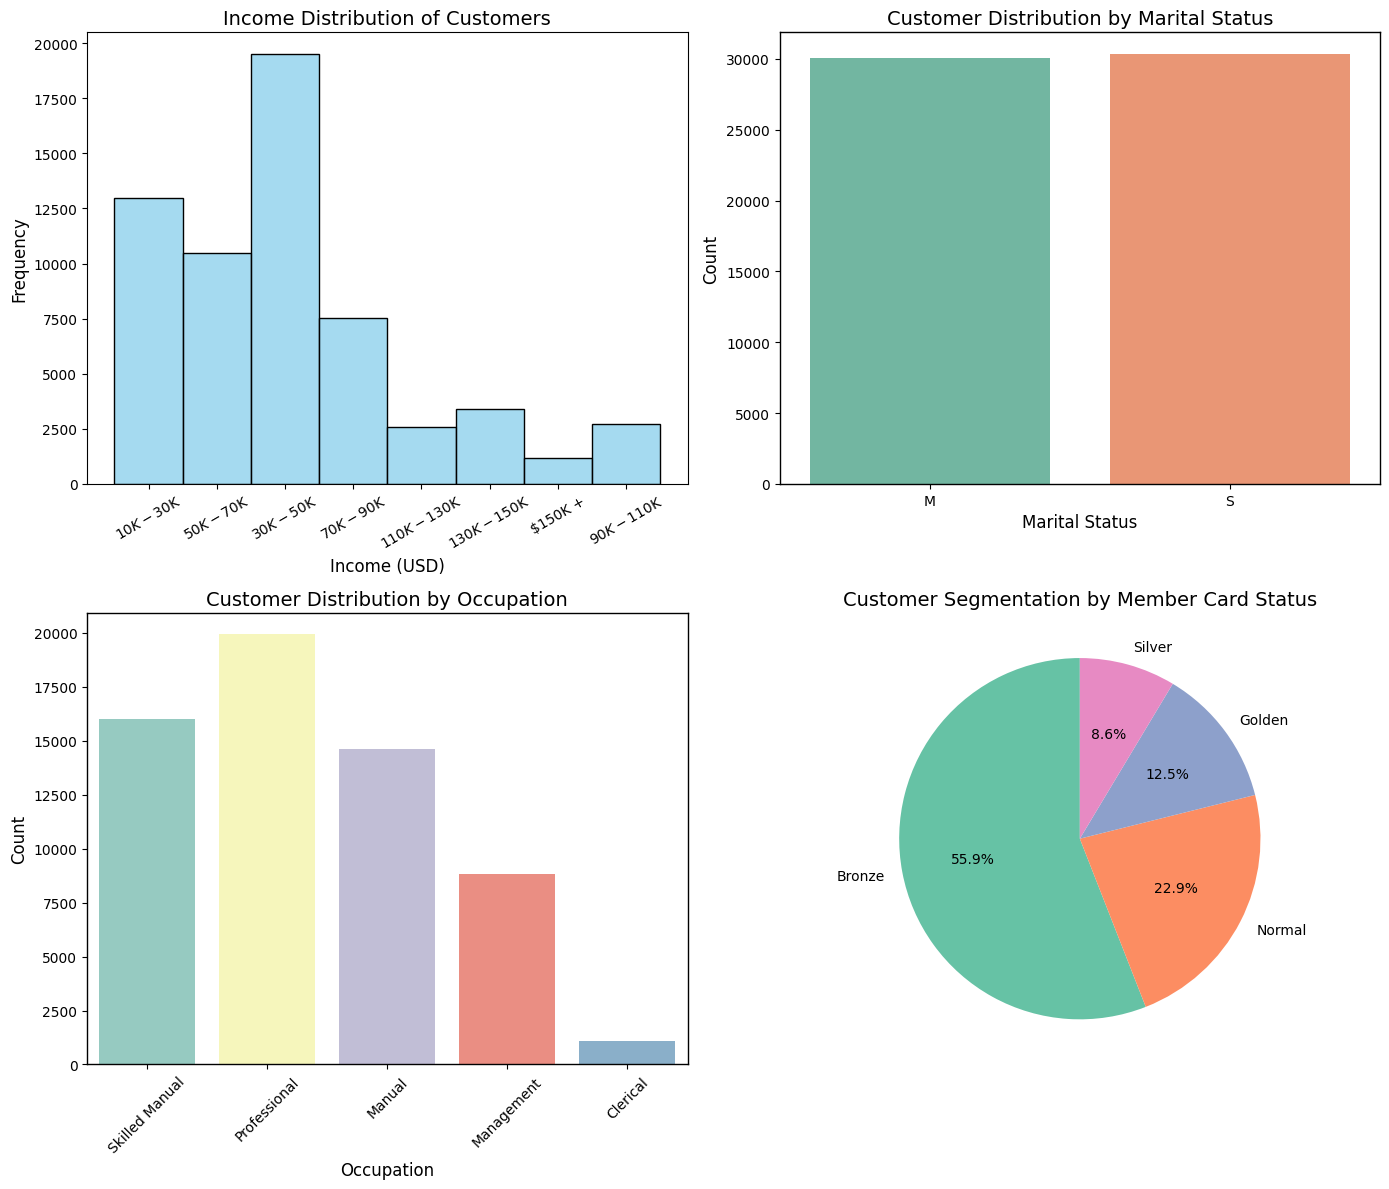

In [5]:
# Code to Retrieve Basic Information About Our Customers Visualization (Click to expand)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histogram for Customer Income Distribution
sns.histplot(campaign_df['avg. yearly_income'], kde=False, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution of Customers', fontsize=14)
axes[0, 0].set_xlabel('Income (USD)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=30)  # Rotate x labels for better readability

# 2. Countplot for Customer Demographics (Marital Status)
sns.countplot(x='marital_status', data=campaign_df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Customer Distribution by Marital Status', fontsize=14)
axes[0, 1].set_xlabel('Marital Status', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
# Add borders around the plot
for spine in axes[0, 1].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

# 3. Countplot for Customer Occupation
sns.countplot(x='occupation', data=campaign_df, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Customer Distribution by Occupation', fontsize=14)
axes[1, 0].set_xlabel('Occupation', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability
# Add borders around the plot
for spine in axes[1, 0].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

# 4. Pie Chart for Customer Segmentation (Member Card Status)
customer_segments = campaign_df['member_card'].value_counts()
axes[1, 1].pie(customer_segments, autopct='%1.1f%%', colors=sns.color_palette('Set2'), labels=customer_segments.index, startangle=90)
axes[1, 1].set_title('Customer Segmentation by Member Card Status', fontsize=14)
# Add borders around the pie chart
for spine in axes[1, 1].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.show()

#### **Member Card Sales**

In [6]:
# Code for Grouping member_card for Sales (Click to expand)
member_grouped = campaign_df.select_dtypes(include=['number'])
member_grouped = pd.concat([member_grouped, campaign_df['member_card']], axis=1)
member_grouped = member_grouped.groupby('member_card', observed=False).sum()
member_grouped.sort_values(by='store_sales(in millions)', ascending=False).head(5)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
member_card,,,,,,,,,,,,,,,,,,,,,,,
Bronze,220516.76,88350.7083,104126.0,80382.0,83385.0,15944.0,83385.0,71631.81,467100.31,399196.44,18880.0,11825.0,637312.0,947509202.0,648495208.0,179409508.0,119604806.0,20613.0,11821.0,19972.0,19972.0,18847.0,3358180.07
Normal,90405.56,36273.3745,42631.0,33619.0,15837.0,10372.0,15837.0,29393.45,190736.78,162789.87,7731.0,4849.0,261928.0,387934729.0,264806539.0,73877962.0,49250981.0,8353.0,4869.0,8146.0,8146.0,7734.0,1375474.26
Golden,50607.19,20189.7555,24202.0,25807.0,21049.0,19148.0,21049.0,15789.69,104449.84,89286.77,4232.0,2663.0,142271.0,213319687.0,145969130.0,40410708.0,26939954.0,4520.0,2709.0,4389.0,4389.0,4167.0,746772.69
Silver,33731.89,13474.8604,15955.0,13309.0,12687.0,4652.0,12687.0,11005.89,72008.21,61553.08,2916.0,1839.0,98203.0,142524100.0,96946371.0,27346876.0,18230946.0,3535.0,2002.0,3022.0,3022.0,3249.0,517799.24


As you can see from the table, Bronze members generated the most revenue, followed by Normal members. Targeting promotions at these groups could result in higher returns.

#### **Cost of Acquiring a Customer (CAC) in each media type**

In [7]:
# Code for Grouping data by media_type (Click to expand)
media_grouped = campaign_df.select_dtypes(include=['number'])
media_grouped = pd.concat([media_grouped, campaign_df['media_type']], axis=1)
media_grouped = media_grouped.groupby('media_type', observed=False).mean()
media_grouped.head(5)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
media_type,,,,,,,,,,,,,,,,,,,,,,,
Bulk Mail,6.537452,2.618478,3.059879,2.519815,2.171247,0.795487,2.171247,2.137264,13.859988,11.859722,0.549031,0.354353,18.851895,27362.449233,18701.037605,5196.995372,3464.414811,0.483946,0.273648,0.350882,0.350882,0.434481,104.087744
Cash Register Handout,6.416414,2.570596,3.031734,2.560970,2.099450,0.843328,2.099450,2.116444,13.752401,11.741257,0.558721,0.351074,18.703148,27856.326837,19490.533983,5019.505747,3346.325587,0.432034,0.285607,0.497751,0.497751,0.369815,114.935647
Daily Paper,6.558646,2.610010,3.093573,2.512795,2.149834,0.860715,2.149834,2.123313,13.989111,11.959912,0.559484,0.346161,18.956046,26228.799961,17770.890994,5074.838836,3383.098847,0.420395,0.178160,0.473139,0.473139,0.652276,89.223149
"Daily Paper, Radio",6.501232,2.607047,3.090029,2.517009,2.212903,0.798974,2.212903,2.103114,13.819157,11.816993,0.562463,0.354985,18.763050,27226.970528,18628.741349,5159.058798,3439.359824,0.746041,0.457038,0.604985,0.604985,0.585777,97.971450
"Daily Paper, Radio, TV",6.593734,2.633329,3.125473,2.557532,2.244512,0.892506,2.244512,2.110609,13.898123,11.883179,0.566048,0.346707,18.931681,26691.346139,17960.431491,5238.633989,3492.320023,0.606359,0.400265,0.569833,0.569833,0.591787,90.753003


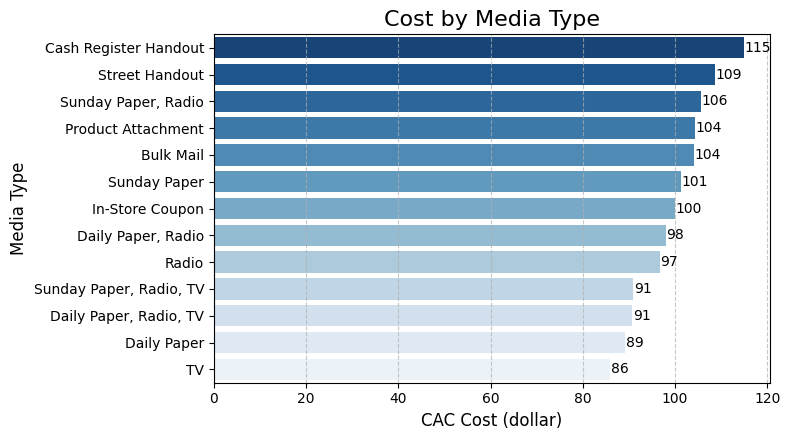

In [8]:
# Code for plot Average CAC cost in each mediatype (Click to expand)
# Calculate mean cost for each media type
media_cost_mean = campaign_df.groupby("media_type")["cost"].mean().sort_values(ascending=False)
sorted_media_types = media_cost_mean.index

# Custom Color palette
custom_palette = sns.color_palette("Blues", n_colors=len(sorted_media_types))  # Adjust based on the number of media types

# Create the bar chart
plt.figure(figsize=(8, 4.5))
ax = sns.barplot(
    x="cost", 
    y="media_type", 
    data=campaign_df, 
    order=sorted_media_types,  # Sort by media type
    palette=custom_palette[::-1],  # Reversed for darker-to-lighter progression
    orient="h",  # Horizontal orientation
    ci=None  # Remove error bars
)

# Add labels showing the mean on each bar
for index, value in enumerate(media_cost_mean):
    ax.text(
        value + 0.1,  # Slightly offset from the end of the bar
        index,        # Position matches the y-axis
        f"{value:.0f}",  # Format as integer
        color="black", 
        va="center", 
        fontsize=10
    )

# Customize the chart
plt.title("Cost by Media Type", fontsize=16)
plt.xlabel("CAC Cost (dollar)", fontsize=12)
plt.ylabel("Media Type", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


As you can see, the highest CAC costs were observed in Cash Register Handouts and Street Handouts. While these methods appear to be the most accessible and easiest ways to promote to customers, they actually incur the highest costs. Conversely, the TV media type proved to be the most efficient, achieving the lowest CAC despite the relatively high costs of TV advertising.

#### **Cost of Acquiring a Customer (CAC) per unit sold by mediatype**

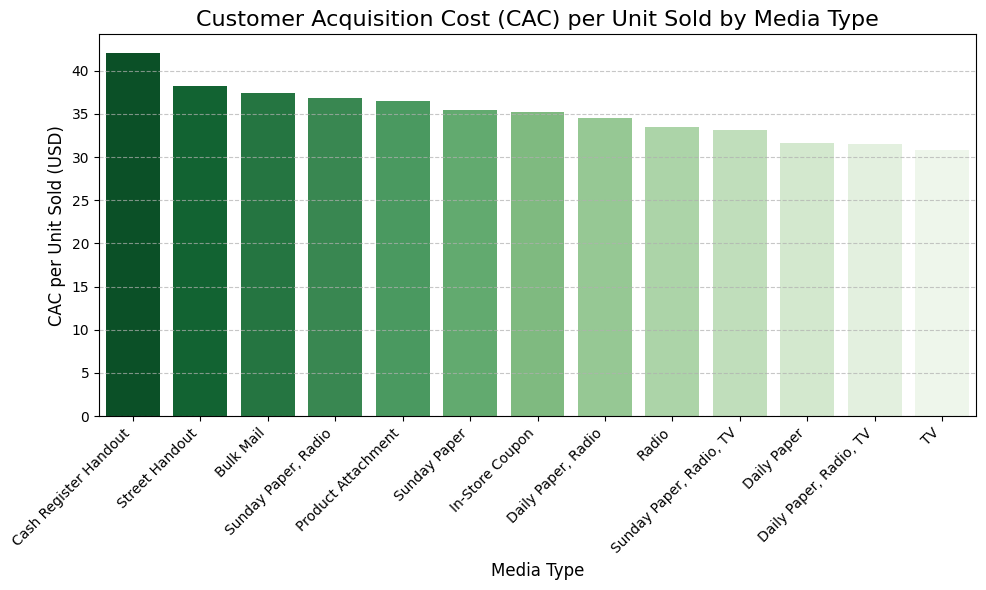

In [9]:
# Code for plot CAC per unit sold by media type (Click to expand)
campaign_df['cac_per_unit'] = campaign_df['cost'] / campaign_df['unit_sales(in millions)']
media_cac_per_unit = campaign_df.groupby('media_type')['cac_per_unit'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=media_cac_per_unit.index, y=media_cac_per_unit.values, palette="Greens_r")

plt.xticks(rotation=45, ha='right')
plt.title("Customer Acquisition Cost (CAC) per Unit Sold by Media Type", fontsize=16)
plt.xlabel("Media Type", fontsize=12)
plt.ylabel("CAC per Unit Sold (USD)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Continuing with this figure, the CAC per unit sold appears to follow a similar trend to the CAC cost across media types. This implies that TV advertising incurs the lowest CAC per unit sold, making it the most efficient medium for promotion.

Now, let's move on to the next feature, Promotion.

#### **Total Sales in each promotion**

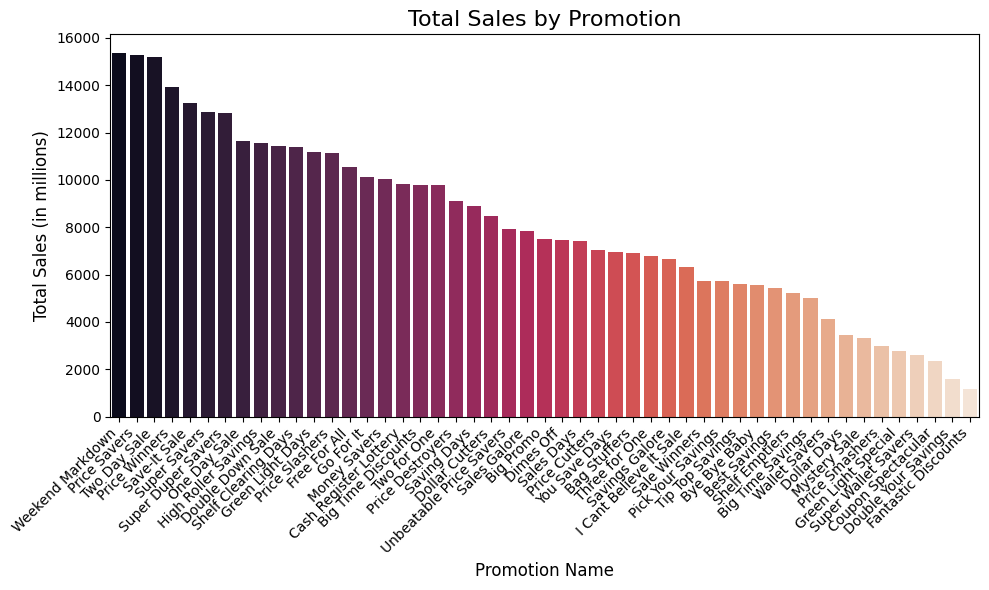

In [10]:
# Code for plot the Total Sales by Promotion (Click to expand)
# Group by promotion and calculate total sales
promotion_sales = campaign_df.groupby('promotion_name')['store_sales(in millions)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=promotion_sales.index, y=promotion_sales.values, palette="rocket")  # Change palette here
plt.xticks(rotation=45, ha='right')
plt.title("Total Sales by Promotion", fontsize=16)
plt.xlabel("Promotion Name", fontsize=12)
plt.ylabel("Total Sales (in millions)", fontsize=12)
plt.tight_layout()
plt.show()


#### **Heatmap show relationship of promotion and food categories sales**

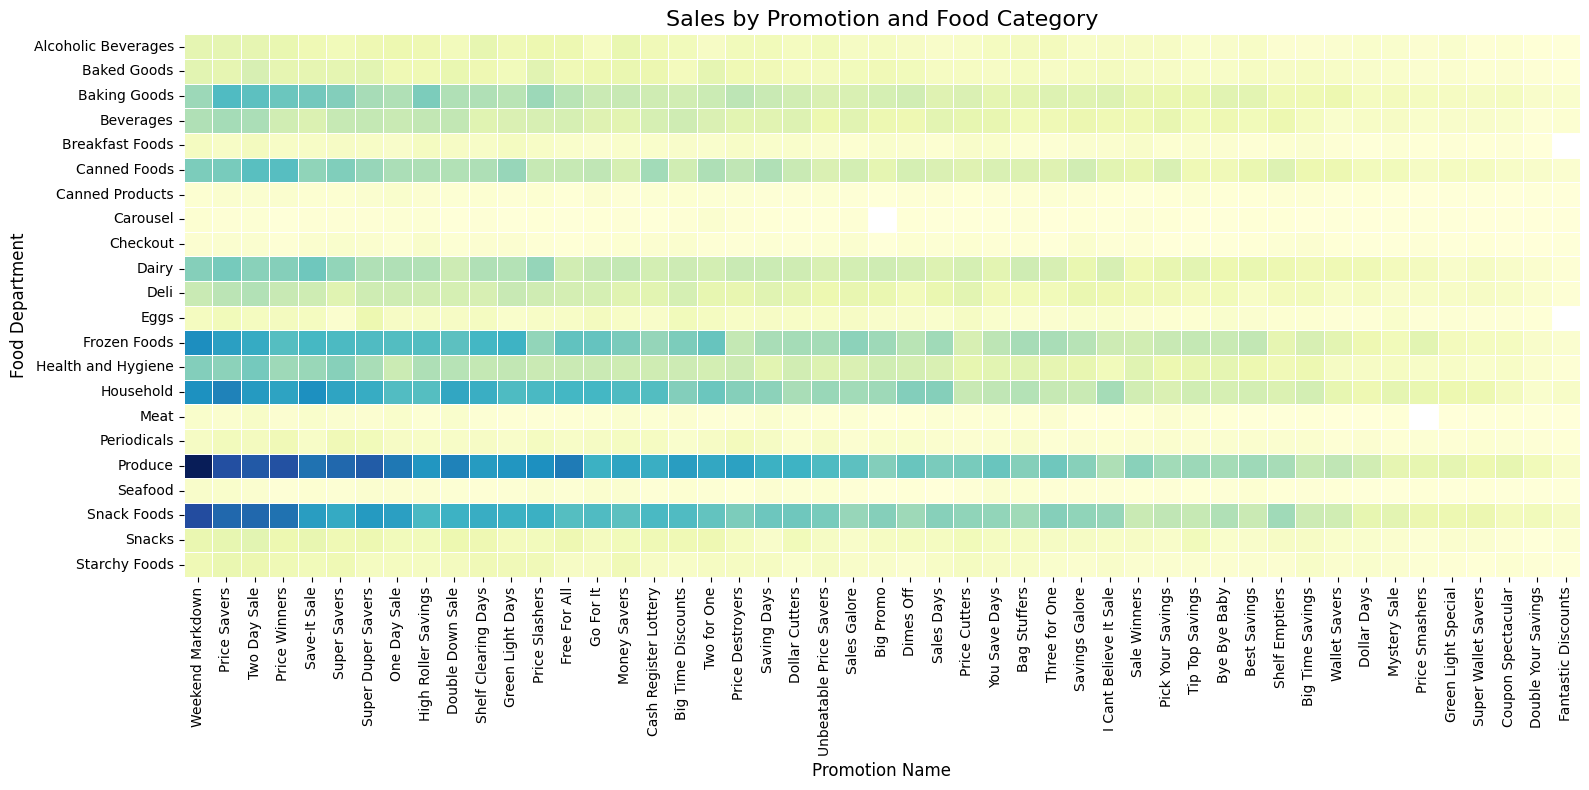

In [11]:
# Code for plot Heatmap to show the relationship between promotion and food category sales (Click to expand)
# Calculate total sales per promotion
promotion_sales = campaign_df.groupby('promotion_name')['store_sales(in millions)'].sum().sort_values(ascending=False)
sorted_promotions = promotion_sales.index 

# Create the pivot table and reorder columns based on the sorted promotion names
pivot_data = campaign_df.pivot_table(
    index='food_department', 
    columns='promotion_name', 
    values='store_sales(in millions)', 
    aggfunc='sum'
)

pivot_data = pivot_data[sorted_promotions]

plt.figure(figsize=(16, 8))
sns.heatmap(
    pivot_data, 
    annot=False, 
    cmap="YlGnBu", 
    fmt=".1f", 
    linewidths=0.5, 
    cbar=False  # Disable colorbar
)


plt.title("Sales by Promotion and Food Category", fontsize=16)
plt.xlabel("Promotion Name", fontsize=12)  # Label for x-axis
plt.ylabel("Food Department", fontsize=12)  # Label for y-axis
plt.tight_layout()
plt.show()


As you can see, the top three promotions in terms of sales were 'Weekend Markdown', 'Price Savers', and 'Two Days Sale', with most items sold being Produce, Snack Foods, Frozen Foods, and Household products. These insights prompt further investigation, such as identifying the key factors in each promotion that attract customers or exploring how we can design promotions that drive higher sales.

This is just an example of insights from the data, we can dive deeper into other areas as well.

## **Data Pre-processing**
Before creating the machine learning model, the data should be cleaned and pre-processed to improve the model's accuracy and correctness.
We removed the outliers and applied feature engineering to increase the model's accuracy.
In the first step, we inspected the dataset and confirmed that it had no null values. Therefore, we could proceed to detect outliers in each feature.

### **Outlier**
From my inspection, the dataset appears to be clean, with no outstanding outliers or incorrect values due to human error. Therefore, we can skip this step and move on to the next one.

### **Feature Engineering**
Feature Engineering not only helps to increase the model's efficiency but also helps us to gain a deeper understanding of the dataset. <br>

**Feature Engineering Features**
- **CustomerProfileStrength** - A composite score based on houseownership, education, membership, and income.
- **Store sales by occupation** - Grouping store sales by occupation
- **Store sales by houseowner** - Grouping store sales by houseownership status.
- **Promotion Impact on Sales by Product Type** - Effectiveness of promotions by product type.
- **Product popularity by Promotion** - Indicates the popularity of promotions.
- **Sales per promotion** - Sales generated per promotion.

In [12]:
# Code for crafting Profile Strength Feature (Click to expand)
from sklearn.preprocessing import MinMaxScaler
# Map the data value to strength score
education_mapping = {
    "Partial High School": 1,
    "High School Degree": 2,
    "Partial College": 3,
    "Bachelors Degree": 4,
    "Graduate Degree": 5
}
houseowner_mapping = {"Y": 1, "N": 0}
member_card_mapping = {
    "Normal": 1,
    "Bronze": 2,
    "Silver": 3,
    "Golden": 4
}
income_mapping = {
    "$10K - $30K": 1,
    "$30K - $50K": 2,
    "$50K - $70K": 3,
    "$70K - $90K": 4,
    "$90K - $110K": 5,
    "$110K - $130K": 6,
    "$130K - $150K": 7,
    "$150K +": 8
}
scaler = MinMaxScaler()
campaign_df["education_encoded"] = campaign_df["education"].map(education_mapping)
campaign_df["income_encoded"] = campaign_df["avg. yearly_income"].map(income_mapping)
campaign_df["houseowner_encoded"] = campaign_df["houseowner"].map(houseowner_mapping)
campaign_df["member_card_encoded"] = campaign_df["member_card"].map(member_card_mapping)
campaign_df["normalized_children"] = scaler.fit_transform(campaign_df[["total_children"]])
campaign_df["normalized_income"] = scaler.fit_transform(campaign_df[["income_encoded"]])

# Update weights for profile strength calculation
weights = {
    "education_encoded": 0.25,
    "houseowner_encoded": 0.15,
    "member_card_encoded": 0.2,
    "normalized_income": 0.3,  # Use normalized income
    "normalized_children": 0.1
}

# Calculate profile strength with updated weights
campaign_df["profile_strength"] = (
    campaign_df["education_encoded"] * weights["education_encoded"] +
    campaign_df["houseowner_encoded"] * weights["houseowner_encoded"] +
    campaign_df["member_card_encoded"] * weights["member_card_encoded"] +
    campaign_df["normalized_income"] * weights["normalized_income"] +
    campaign_df["normalized_children"] * weights["normalized_children"]
)


In [13]:
# Code for crafting Store and Sales features
# Store sales by occupation 
occupation_sales = campaign_df.groupby('occupation')['store_sales(in millions)'].mean().reset_index()
campaign_df = campaign_df.merge(occupation_sales, on='occupation', suffixes=('', '_occupation_sales'))

# Store sales by houseowner
houseowner_sales = campaign_df.groupby('houseowner')['store_sales(in millions)'].mean().reset_index()
campaign_df = campaign_df.merge(houseowner_sales, on='houseowner', suffixes=('', '_houseowner_sales'))

# Promotion Impact on Sales by Product Type
promotion_product_sales = campaign_df.groupby(['promotion_name', 'food_category'])['store_sales(in millions)'].sum().reset_index()
campaign_df = campaign_df.merge(promotion_product_sales, on=['promotion_name', 'food_category'], suffixes=('', '_promotion_sales'))

# Product popularity by Promotion
product_popularity = campaign_df.groupby('food_category')['store_sales(in millions)'].mean().reset_index()
campaign_df = campaign_df.merge(product_popularity, on='food_category', suffixes=('', '_popularity_score'))

# Sales per promotion
campaign_df['sales_per_promotion_dollar'] = campaign_df['store_sales(in millions)'] / campaign_df['store_cost(in millions)']

After crafting new features, we should scale the data; however, in this project, I prefer the Gradient Boosting model, so scaling is unnecessary. We will now proceed to build the model.

## **Model Development**
For high accuracy, we prefer Gradient Boosting models, such as XGBoost, LightGBM, or CatBoost.
Due to the large number of categorical features, we chose the CatBoost model, which has the ability to handle categorical data by encoding it internally, without the need for LabelEncoder or dummy variables. <br>
First, we inspect all data types and change them if necessary.

In [14]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   food_category                              60428 non-null  object 
 1   food_department                            60428 non-null  object 
 2   food_family                                60428 non-null  object 
 3   store_sales(in millions)                   60428 non-null  float64
 4   store_cost(in millions)                    60428 non-null  float64
 5   unit_sales(in millions)                    60428 non-null  float64
 6   promotion_name                             60428 non-null  object 
 7   sales_country                              60428 non-null  object 
 8   marital_status                             60428 non-null  object 
 9   gender                                     60428 non-null  object 
 10  total_children        

It seems that all features are in the proper format for CatBoost, which can automatically convert binary classes, for example, from 'Yes' and 'No' to 1 and 0.

### **Training CatBoost Model**

In [15]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = campaign_df.drop(columns=['cost'])  
y = campaign_df['cost']

# Identify categorical features
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_features,
    early_stopping_rounds=50,
    random_seed=42,
    verbose=0  # Silence output
)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)
y_pred = model.predict(X_test)

# Evaluate performance on test data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.5f}')
print(f'Mean Absolute Error: {mae:.5f}')
print(f'Root Mean Squared Error: {rmse:.5f}')

0:	learn: 27.3697509	test: 27.4208278	best: 27.4208278 (0)	total: 122ms	remaining: 2m 2s
100:	learn: 1.1281616	test: 1.1400243	best: 1.1400243 (100)	total: 6.18s	remaining: 55s
200:	learn: 0.6580435	test: 0.6673691	best: 0.6673691 (200)	total: 12.1s	remaining: 48.1s
300:	learn: 0.4992290	test: 0.5035499	best: 0.5035499 (300)	total: 17.9s	remaining: 41.7s
400:	learn: 0.3981376	test: 0.4071569	best: 0.4071569 (400)	total: 24.4s	remaining: 36.5s
500:	learn: 0.3347453	test: 0.3485780	best: 0.3485780 (500)	total: 30.3s	remaining: 30.2s
600:	learn: 0.2870586	test: 0.3113942	best: 0.3113942 (600)	total: 36.2s	remaining: 24.1s
700:	learn: 0.2521659	test: 0.2816975	best: 0.2816975 (700)	total: 42.1s	remaining: 17.9s
800:	learn: 0.2242612	test: 0.2601874	best: 0.2600860 (798)	total: 48s	remaining: 11.9s
900:	learn: 0.2026204	test: 0.2438142	best: 0.2438142 (900)	total: 54s	remaining: 5.93s
999:	learn: 0.1834706	test: 0.2316035	best: 0.2316035 (999)	total: 1m	remaining: 0us

bestTest = 0.23160347

#### **The model has a Root Mean Squared Error (RMSE) of 0.23 dollars, which indicates that the model performs quite well on the test set, especially when compared to the average cost of approximately 100 dollars.**
However, we cannot simply conclude that the model is performing well. We need to check if the model is overfitting by using cross-validation, which partitions the data into multiple folds and trains the model multiple times.

### **Cross Validation**

In [16]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
mse_scores = []
mae_scores = []
rmse_scores = []  # New list for RMSE

for train_index, val_index in kf.split(X):
    print(f"Training Fold {fold}...")
    
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Train the model
    model = CatBoostRegressor(
        iterations=1000,
        learning_rate=0.1,
        depth=6,
        cat_features=categorical_features,
        early_stopping_rounds=50,
        random_seed=42,
        verbose=0  # Silence CatBoost output for cleaner logs
    )
    model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=0)
    
    # Predict and calculate errors
    y_val_pred = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mae = mean_absolute_error(y_val_fold, y_val_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)  # Store RMSE

    print(f"Fold {fold} - MSE: {mse:.5f}, MAE: {mae:.5f}, RMSE: {rmse:.5f}")
    fold += 1

# Calculate mean and standard deviation
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)
rmse_mean = np.mean(rmse_scores)  # Mean of RMSE
rmse_std = np.std(rmse_scores)  # Standard deviation of RMSE

print("\nCross-Validation Results:")
print(f"Mean Squared Error (CV): {mse_mean:.5f} ± {mse_std:.5f}")
print(f"Mean Absolute Error (CV): {mae_mean:.5f} ± {mae_std:.5f}")
print(f"Root Mean Squared Error (CV): {rmse_mean:.5f} ± {rmse_std:.5f}")  # Print RMSE


Training Fold 1...
Fold 1 - MSE: 0.05139, MAE: 0.10292, RMSE: 0.22670
Training Fold 2...
Fold 2 - MSE: 0.05221, MAE: 0.10488, RMSE: 0.22849
Training Fold 3...
Fold 3 - MSE: 0.03974, MAE: 0.09914, RMSE: 0.19934
Training Fold 4...
Fold 4 - MSE: 0.03353, MAE: 0.10474, RMSE: 0.18311
Training Fold 5...
Fold 5 - MSE: 0.03542, MAE: 0.10731, RMSE: 0.18820

Cross-Validation Results:
Mean Squared Error (CV): 0.04246 ± 0.00789
Mean Absolute Error (CV): 0.10380 ± 0.00271
Root Mean Squared Error (CV): 0.20517 ± 0.01906


As you can see from the results, the RMSE and MAE are lower than those of the first model (which had an RMSE of 0.21 dollars) that did not use cross-validation. This implies that the initial model was likely overfitting, so we should tune the model to improve generalization and increase accuracy.

### **Tune the model**

In [17]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the parameter grid
param_dist = {
    'iterations': [500, 750],  # Reduced range for iterations
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'depth': [4, 6, 8],  # Depth of trees
    'l2_leaf_reg': [1, 3],  # Regularization
    'border_count': [32, 64],  # Reduced number of splits
    'random_strength': [0.1, 0.3],  # Random strength for feature selection
    'bagging_temperature': [0.0, 0.5],  # Reduced options for bagging temperature
    'cat_features': [categorical_features],  # List of categorical features
    'early_stopping_rounds': [50]  # Early stopping with 50 rounds
}

# Initialize CatBoost model
model = CatBoostRegressor(
    cat_features=categorical_features,
    random_seed=42,
    thread_count=-1,  # Use all available threads
    verbose=0
)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize (negative MSE for regression)
    cv=3,  # Number of folds for cross-validation
    verbose=1,  # Display progress
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the model to the data
print("Starting Randomized Search...")
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Output results
print("\nRandomized Search Complete.")
print(f"Best parameters: {random_search.best_params_}")
print(f"Best CV Score (negative MSE): {random_search.best_score_:.5f}")
print(f"Test RMSE: {rmse:.5f}")
print(f"Test MAE: {mae:.5f}")

Starting Randomized Search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Randomized Search Complete.
Best parameters: {'random_strength': 0.1, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 750, 'early_stopping_rounds': 50, 'depth': 6, 'cat_features': ['food_category', 'food_department', 'food_family', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'brand_name', 'store_type', 'store_city', 'store_state', 'media_type'], 'border_count': 64, 'bagging_temperature': 0.5}
Best CV Score (negative MSE): -0.31389
Test RMSE: 0.38398
Test MAE: 0.22083


After using RandomizedSearch to fine-tune the model, the RMSE increased. An increase in RMSE after tuning doesn't necessarily mean the model is bad. It indicates that there might be issues such as overfitting or suboptimal parameter selection, which can be addressed by adjusting parameters, adding more data, or applying regularization techniques.

This is an example of tuning parameters. In reality, it is important to compare multiple tuning approaches to properly assess overfitting and select the optimal model.

## **Project Evaluation**
**Objective :**
This project aims to analyze and predict factors influencing the Customer Acquisition Cost (CAC) and other key metrics associated with a customer marketing campaign. The primary focus is to build a predictive model that helps optimize campaign performance and uncover actionable insights for strategic decision-making in marketing.

**Dataset Overview :**
The dataset contains 40 features and over 60,000 records detailing customer demographics, promotion strategies, product characteristics, and store attributes. 

**Exploratory Data Analysis (EDA) :**
Visualized trends in customer behavior, promotion effectiveness, and sales patterns using bar charts, and heatmap.
Identified top-performing media types and promotions based on cost efficiency and sales generation.

**Data Preprocessing :**
No missing values or outliers were found. Feature engineering was performed by creating new features, such as Profile Strength, to score customers based on their demographics and purchasing behavior. Engineered campaign-specific features such as Promotion Efficiency (the ratio of sales to cost) and Unit Cost Efficiency. 

**Model Development :**
Implemented a CatBoostRegressor for predicting campaign costs (cost) based on features.
Optimized the model with RandomizedSearchCV to achieve lower prediction errors.

**Model Evaluation :** <br>
RMSE : 0.20517 (dollars). <br>
MAE : 0.10380 (dollars). <br>
In approximate of 1%-2% of error comparing to the average CAC cost of 99.26 dollar.

**Key Insights :**
- **Customer Profiles :**
Customers with higher Profile Strength (based on income, education, and membership level) tend to have a higher impact on campaign cost efficiency.
- **Promotion Effectiveness :**
Promotions like Bronze Member Card Discounts and In-Store Coupons generated high sales with minimal cost per acquisition.
- **Media Type Analysis :**
Digital channels such as TV and Radio Ads performed better in terms of cost efficiency, while traditional print media like Sunday Papers were less effective.
- **Product-Level Insights :**
Products with higher profit margins and recyclable packaging showed a significant correlation with customer preferences, indicating a rising trend in sustainable shopping.

## **Business Impact and Leverage**


- **Cost Efficiency :** Optimizing marketing spend by targeting the most cost-effective media and promotions.
- **Customer Segmentation :** Creating personalized marketing strategies by understanding customer profiles, leading to better engagement and retention.
- **Product and Promotion Optimization :** Enhancing product positioning and targeting the right promotions to boost sales.
- **Improved Decision-Making :** Using predictive models to forecast customer behavior, improving the accuracy of decision-making.
- **Higher ROI :** Driving greater returns on marketing investments through optimized campaigns.


Thank you for reading until the end! I appreciate your time and attention :)
- Napat Prapavasit